In [1]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU') #to use CPU instead of GPU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv('HousingData.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
x = df.drop(columns = ['MEDV'])
y = df['MEDV']

In [8]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2)

In [9]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((315, 13), (315,), (79, 13), (79,))

In [10]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
# y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
# y_test_scaled = scaler.transform(y_test.reshape(-1, 1))

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13, ), name='input-layer'),
    tf.keras.layers.Dense(100, activation = 'relu', name='hidden-layer-2'),
    tf.keras.layers.BatchNormalization(name='hidden-layer-3'),
    tf.keras.layers.Dense(50, activation = 'relu', name='hidden-layer-4'),
    tf.keras.layers.Dense(1, name='output-layer')
])

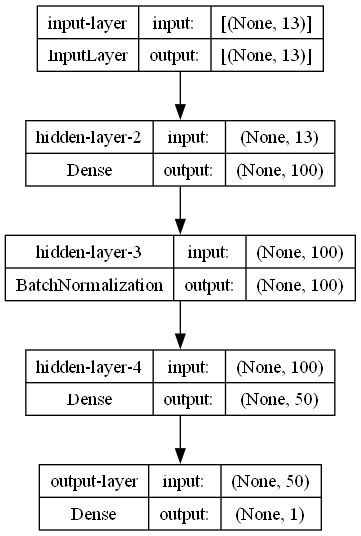

In [12]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-layer-2 (Dense)      (None, 100)               1400      
                                                                 
 hidden-layer-3 (BatchNorma  (None, 100)               400       
 lization)                                                       
                                                                 
 hidden-layer-4 (Dense)      (None, 50)                5050      
                                                                 
 output-layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 6901 (26.96 KB)
Trainable params: 6701 (26.18 KB)
Non-trainable params: 200 (800.00 Byte)
_________________________________________________________________


In [14]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [15]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [16]:
history = model.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs = 100, batch_size = 32, 
                    callbacks = [early_stop], verbose=1)

Epoch 1/100


10/10 [==============================] - 3s 52ms/step - loss: 536.2016 - mae: 21.2451 - val_loss: 561.4128 - val_mae: 21.6890
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 476.8497 - mae: 20.0282 - val_loss: 539.4042 - val_mae: 21.2653
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 414.3232 - mae: 18.6119 - val_loss: 508.4730 - val_mae: 20.6390
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 346.7021 - mae: 16.9235 - val_loss: 468.2778 - val_mae: 19.7736
Epoch 5/100
10/10 [==============================] - 0s 11ms/step - loss: 276.1318 - mae: 14.8904 - val_loss: 418.3183 - val_mae: 18.6264
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 208.1971 - mae: 12.6291 - val_loss: 362.5530 - val_mae: 17.2395
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 148.1398 - mae: 10.1639 - val_loss: 304.6059 - val_mae: 15.6704
Epoch 8/100
10/10 [==============

10/10 [==============================] - 0s 9ms/step - loss: 9.3509 - mae: 2.2846 - val_loss: 9.7159 - val_mae: 2.2917
Epoch 59/100
10/10 [==============================] - 0s 9ms/step - loss: 11.7605 - mae: 2.5039 - val_loss: 9.3235 - val_mae: 2.2278
Epoch 60/100
10/10 [==============================] - 0s 10ms/step - loss: 9.3453 - mae: 2.3195 - val_loss: 9.4182 - val_mae: 2.2310
Epoch 61/100
10/10 [==============================] - 0s 10ms/step - loss: 15.7319 - mae: 2.9098 - val_loss: 10.2030 - val_mae: 2.3631
Epoch 62/100
10/10 [==============================] - 0s 9ms/step - loss: 11.6079 - mae: 2.5266 - val_loss: 10.0521 - val_mae: 2.3105
Epoch 63/100
10/10 [==============================] - 0s 9ms/step - loss: 12.4782 - mae: 2.7753 - val_loss: 9.8592 - val_mae: 2.2919
Epoch 64/100
10/10 [==============================] - 0s 10ms/step - loss: 11.1776 - mae: 2.4834 - val_loss: 9.5369 - val_mae: 2.2506


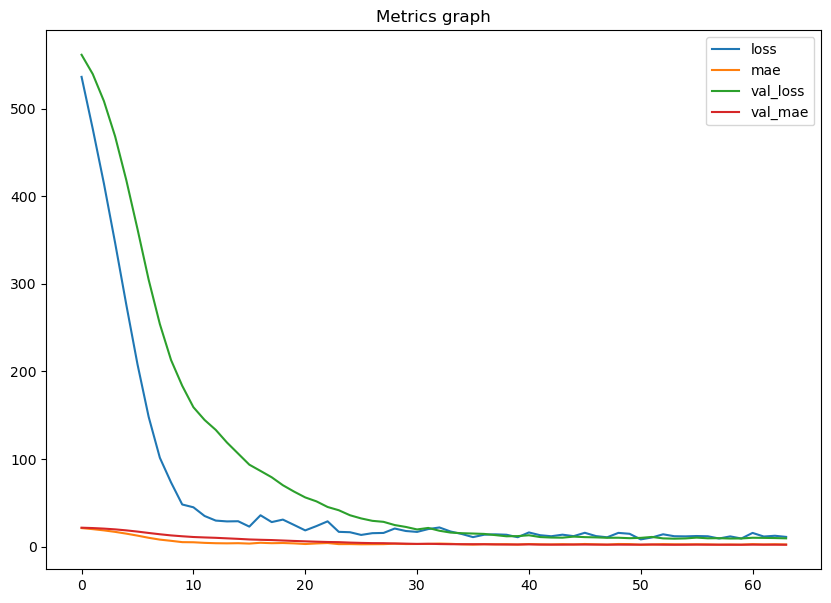

In [17]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics graph")
plt.show()

In [18]:
# y_pred = model.predict(x_test_scaled)
y_pred = model.predict(x_test_scaled).flatten()

3/3 [==============================] - 0s 3ms/step


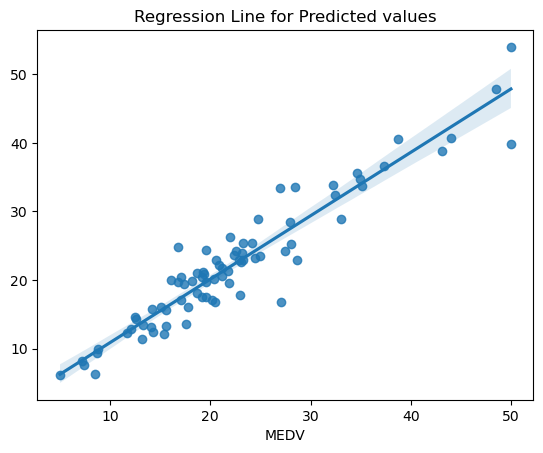

In [19]:
sns.regplot(x=y_test, y=y_pred)
plt.title("Regression Line for Predicted values")
plt.show()

In [20]:
def regression_metrics_display(y_test, y_pred):
  print(f"MAE is {metrics.mean_absolute_error(y_test, y_pred)}")
  print(f"MSE is {metrics.mean_squared_error(y_test,y_pred)}")
  print(f"R2 score is {metrics.r2_score(y_test, y_pred)}")

In [21]:
regression_metrics_display(y_test, y_pred)

MAE is 2.202771412571774
MSE is 9.14444077463922
R2 score is 0.9004048676963758
